# The Sparks Foundation: Graduate Rotational Internship Program
## Name: Nilesh Pendharkar
## Data Science & Business Analytics Intern at The Sparks Foundation

# Task 2: Prediction using Unsupervised ML

## *From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually*

## Table of contents:
1. Problem Statement
2. About the data
3. Exploratory data analysis
4. Finding numbers of Clusters for Kmeans algorithum


## 1. Problem Statement:

The aim of this project is from the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 2. About the data:

Data link: https://bit.ly/3kXTdox


In [2]:
# Importing the data file
iris = pd.read_csv('Iris.csv')
# Viewing first few rows
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Viewing last few rows
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


## 3. Exploratory data analysis:

In [4]:
# Viewing the columns
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
# diamensions of data
iris.shape

(150, 6)

In [6]:
# Checking the data if there is any null value
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
# Removing the 'Id' column from table as it is not required in analysis
iris_1 = iris.drop(['Id'], axis=1)
iris_1

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
# Renaming the columns of data
iris_2 = iris_1.rename(columns= {"SepalLengthCm": "Sepal Length (CM)", "SepalWidthCm": "Sepal Width (CM)",
                        "PetalLengthCm": "Petal Length (CM)", "PetalWidthCm": "Petal Width (CM)"})

In [9]:
# After renaming
iris_2

,Sepal Length (CM),Sepal Width (CM),Petal Length (CM),Petal Width (CM),Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## 4. Finding numbers of Clusters for Kmeans algorithum

We can find this Kmeans Clusters using elbow method.

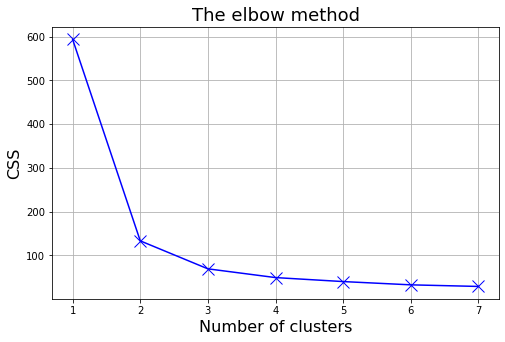

In [10]:
# Finding the optimum numbers of clusters for K-means algorithum

# Setting the variable
x = iris_2.iloc[:, 0:3].values

css = []

# Importing the K-means model
from sklearn.cluster import KMeans

# Finding inertia on various k values
for i in range(1, 8):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 100,
                   n_init = 10, random_state = 0).fit(x)
    css.append(kmeans.inertia_)

# plotting line on graph
plt.figure(figsize= (8, 5))
plt.plot(range(1, 8), css, 'bx-', color = 'blue', markersize = 12)
plt.xlabel("Number of clusters", fontsize = 16)
plt.ylabel("CSS", fontsize = 16)
plt.title("The elbow method", fontsize = 18)
plt.grid()
plt.show()

From one can clearly see that according to the elbow method most accurate value for number of cluseter is 3.

## Applying KMeans Classifier 

In [11]:
kmeans = KMeans(n_clusters=3,init = 'k-means++', max_iter = 100, n_init = 10, random_state = 0)

y_kmeans = kmeans.fit_predict(x)

## Visualizing the Clusters

In [12]:
kmeans.cluster_centers_

array([[5.006     , 3.418     , 1.464     ],
       [5.84655172, 2.73275862, 4.3637931 ],
       [6.83571429, 3.06428571, 5.6547619 ]])

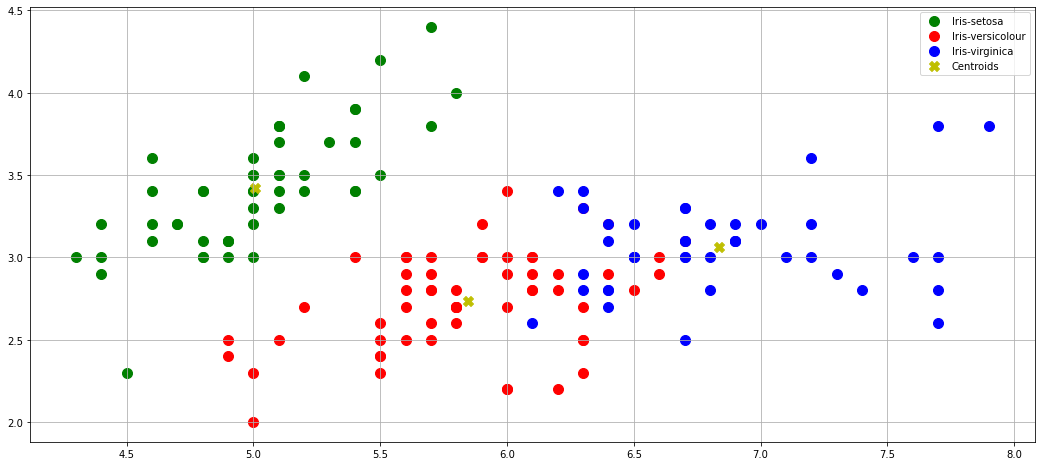

In [13]:
# Visualising the clusters - On the first two columns

plt.figure(figsize= (18, 8))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1] , c = 'g', label = 'Iris-setosa', s = 100)
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], label = 'Iris-versicolour', c = 'r', s = 100)
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], label = 'Iris-virginica', c = 'b', s = 100)
plt.legend()

# Plotting the centroids of clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], label = "Centroids", s = 100, c ='y', marker = 'X')
plt.legend()
plt.grid()